# Project: Predicting Stock Price & Return  
Deep Learning
## ver 0.1  
All guidance and guildlines provided by Romeo Kienzler

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#let the notebook display full length of the data columns
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
df = pd.read_csv("data_feature_created.csv")

In [4]:
feature_names = ['loblaw_ma14', 'loblaw_rsi14', 'loblaw_ma30', 'loblaw_rsi30', 'loblaw_ma50', 'loblaw_rsi50', 'loblaw_ma200', 'loblaw_rsi200', 'loblaw_5d_pct', 'loblaw_price', 'loblaw_volume_1d_pct_SMA', 'metro_ma14', 'metro_rsi14', 'metro_ma30', 'metro_rsi30', 'metro_ma50', 'metro_rsi50', 'metro_ma200', 'metro_rsi200', 'metro_5d_pct', 'metro_price', 'metro_volume_1d_pct_SMA', 'gwl_ma14', 'gwl_rsi14', 'gwl_ma30', 'gwl_rsi30', 'gwl_ma50', 'gwl_rsi50', 'gwl_ma200', 'gwl_rsi200', 'gwl_5d_pct', 'gwl_price', 'gwl_volume_1d_pct_SMA', 'empa_ma14', 'empa_rsi14', 'empa_ma30', 'empa_rsi30', 'empa_ma50', 'empa_rsi50', 'empa_ma200', 'empa_rsi200', 'empa_5d_pct', 'empa_price', 'empa_volume_1d_pct_SMA', 'atd_ma14', 'atd_rsi14', 'atd_ma30', 'atd_rsi30', 'atd_ma50', 'atd_rsi50', 'atd_ma200', 'atd_rsi200', 'atd_5d_pct', 'atd_price', 'atd_volume_1d_pct_SMA', 'tsx_ma14', 'tsx_rsi14', 'tsx_ma30', 'tsx_rsi30', 'tsx_ma50', 'tsx_rsi50', 'tsx_ma200', 'tsx_rsi200', 'tsx_5d_pct', 'tsx_price', 'tsx_volume_1d_pct_SMA', 'sp500_ma14', 'sp500_rsi14', 'sp500_ma30', 'sp500_rsi30', 'sp500_ma50', 'sp500_rsi50', 'sp500_ma200', 'sp500_rsi200', 'sp500_5d_pct', 'sp500_price', 'sp500_volume_1d_pct_SMA', 'BCPI', 'CPI', 'bank_interest', 'CEER', 'trend_grocery_store', 'trend_loblaws', 'trend_stock']

In [14]:
features = df[feature_names]
targets = df[['loblaws_5d_return_level']].values.ravel() + 2

In [15]:
train_size = int(0.75 * features.shape[0])
train_features = features[:train_size]
train_targets = targets[:train_size]
test_features = features[train_size:]
test_targets = targets[train_size:]

print(train_features.shape, train_targets.shape)
print(test_features.shape, test_targets.shape)

(2920, 84) (2920,)
(974, 84) (974,)


In [16]:
from sklearn.preprocessing import scale

# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Epoch 1/120
2920/2920 [==============================] - 1s 463us/step - loss: 1.6489 - acc: 0.2127
Epoch 2/120
2920/2920 [==============================] - 0s 158us/step - loss: 1.5964 - acc: 0.2562
Epoch 3/120
2920/2920 [==============================] - 0s 119us/step - loss: 1.5804 - acc: 0.2616
Epoch 4/120
2920/2920 [==============================] - 0s 152us/step - loss: 1.5704 - acc: 0.2771
Epoch 5/120
2920/2920 [==============================] - 0s 83us/step - loss: 1.5702 - acc: 0.2777
Epoch 6/120
2920/2920 [==============================] - 1s 197us/step - loss: 1.5668 - acc: 0.2729
Epoch 7/120
2920/2920 [==============================] - 0s 130us/step - loss: 1.5453 - acc: 0.2990
Epoch 8/120
2920/2920 [==============================] - 0s 85us/step - loss: 1.5417 - acc: 0.2914
Epoch 9/120
2920/2920 [==============================] - 0s 91us/step - loss: 1.5397 - acc: 0.2993
Epoch 10/120
2920/2920 [==============================] - 1s 293us/step - loss: 1.5267 - acc: 0.3038
Ep

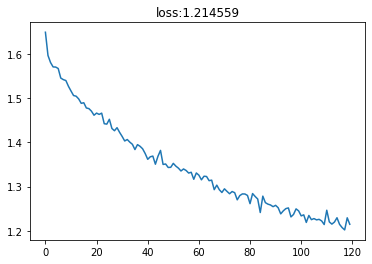

In [36]:
# Create model with dropout
model = Sequential()
model.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

# Fit model with mean squared error loss function
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(scaled_train_features, train_targets, epochs=120)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [37]:
score = model.evaluate(scaled_test_features, test_targets, verbose=0)
print(score)

[2.3066942442124385, 0.21765913766879566]


In [38]:
train_pred = model.predict(scaled_train_features)
test_pred = model.predict(scaled_test_features)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(test_pred, axis=1), test_targets)

array([[28, 38, 45, 38, 36],
       [15, 34, 35, 28, 19],
       [35, 44, 55, 45, 23],
       [22, 33, 52, 33, 34],
       [27, 54, 73, 66, 62]])

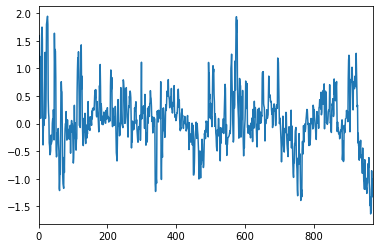

In [30]:
pd.Series(test_pred.dot([-2,-1,0,1,2])).plot()

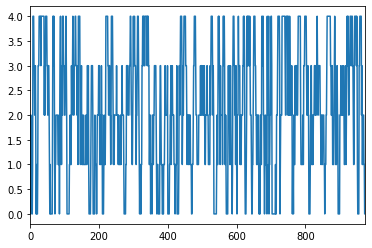

In [32]:
pd.Series(test_targets).plot()

In [68]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_pred))
print(r2_score(test_targets, test_pred))

0.006255009856767968
-0.014458718543206794


In [40]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

In [41]:
(train_features.shape[0] - 28) % 64

12

In [42]:
from sklearn.preprocessing import scale

# Standardize the train and test features
scaled_features = scale(features)

In [43]:
scaled_features.shape

(3894, 84)

In [44]:
batch_size = 64
epochs = 120
timesteps = 5

In [45]:
scaled_lstm_features = []
for column in range(scaled_features.shape[1]):
    time_series = []
    for i in range(len(scaled_features) - timesteps):
        time_series.append(scaled_features[i:i + timesteps, column])
#    time_series = np.dstack(time_series)
    scaled_lstm_features.append(time_series)
scaled_lstm_features = np.dstack(scaled_lstm_features)
print(type(scaled_lstm_features))
print(scaled_lstm_features.shape)

<class 'numpy.ndarray'>
(3889, 5, 84)


In [53]:
lstm_targets = pd.get_dummies(targets)

In [54]:
train_size = int(0.85 * scaled_lstm_features.shape[0])
train_start = train_size % batch_size

scaled_train_features = scaled_lstm_features[train_start:train_size]
train_targets = lstm_targets[train_start:train_size]
scaled_test_features = scaled_lstm_features[train_size:]
test_targets = lstm_targets[train_size:-5]

print(scaled_train_features.shape, train_targets.shape)
print(scaled_test_features.shape, test_targets.shape)


(3264, 5, 84) (3264, 5)
(584, 5, 84) (584, 5)


Train on 3264 samples, validate on 584 samples
Epoch 1/120
 - 5s - loss: 1.6245 - val_loss: 1.6007
Epoch 2/120
 - 1s - loss: 1.5464 - val_loss: 1.5530
Epoch 3/120
 - 1s - loss: 1.5042 - val_loss: 1.5140
Epoch 4/120
 - 1s - loss: 1.4771 - val_loss: 1.4900
Epoch 5/120
 - 1s - loss: 1.4535 - val_loss: 1.4709
Epoch 6/120
 - 1s - loss: 1.4359 - val_loss: 1.4319
Epoch 7/120
 - 1s - loss: 1.4031 - val_loss: 1.4076
Epoch 8/120
 - 1s - loss: 1.3864 - val_loss: 1.3858
Epoch 9/120
 - 1s - loss: 1.3694 - val_loss: 1.3629
Epoch 10/120
 - 1s - loss: 1.3431 - val_loss: 1.3424
Epoch 11/120
 - 1s - loss: 1.3325 - val_loss: 1.3243
Epoch 12/120
 - 1s - loss: 1.3201 - val_loss: 1.3103
Epoch 13/120
 - 1s - loss: 1.3138 - val_loss: 1.3095
Epoch 14/120
 - 1s - loss: 1.2862 - val_loss: 1.3022
Epoch 15/120
 - 1s - loss: 1.2808 - val_loss: 1.2956
Epoch 16/120
 - 1s - loss: 1.2779 - val_loss: 1.2887
Epoch 17/120
 - 1s - loss: 1.2676 - val_loss: 1.2829
Epoch 18/120
 - 1s - loss: 1.2562 - val_loss: 1.2681
Epoch 19

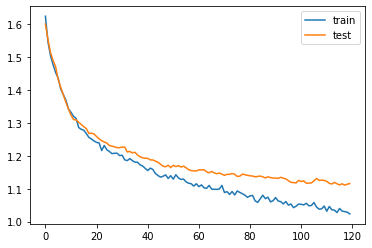

In [66]:
model = Sequential()
model.add(LSTM(50, input_shape=(scaled_train_features.shape[1], scaled_train_features.shape[2]),dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

history = model.fit(scaled_train_features, train_targets, epochs=epochs, batch_size=batch_size, 
                    validation_data=(scaled_test_features, test_targets), verbose=2, shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [67]:
train_pred = model.predict(scaled_train_features)
test_pred = model.predict(scaled_test_features)

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(test_pred, axis=1), np.argmax(test_targets.values, axis=1))

array([[53, 29, 20,  4,  1],
       [ 8, 49, 26,  8,  0],
       [ 8, 26, 67, 30,  3],
       [ 1, 14, 41, 61, 29],
       [ 0,  0, 10, 21, 75]])